In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [3]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [4]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]
    
#     print(prev_date,prev_sec)

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
#         print(curr_sec,prev_sec)
        
        if((diff_sec>3.0)&(curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
    #         print(calc_ts(start_sec))
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

                 timestamp         x         y         z
0  2018-10-05 19:50:43.588 -0.266954  1.013944  9.587581
1  2018-10-05 19:50:43.745 -0.377087  0.654814  9.812635
2  2018-10-05 19:50:43.906 -0.022745  0.803255  9.783905
3  2018-10-05 19:50:44.068 -0.113725  1.080982  9.645041
4  2018-10-05 19:50:44.228 -0.223858  0.946907  9.788693
                 timestamp         x         y         z
0  2018-10-20 11:21:19.914 -0.075417  1.007959  9.610326
1  2018-10-20 11:21:20.068 -0.003591  0.768539  9.639056
2   2018-10-20 11:21:20.23  0.009577  0.840365  9.634268
3  2018-10-20 11:21:20.388  0.129287  1.031901  9.548077
4  2018-10-20 11:21:20.549  0.009577  0.840365  9.576807
                 timestamp         x         y         z
0  2018-10-05 14:42:28.999  0.590171  0.414197  9.877279
1  2018-10-05 14:42:29.159  0.585382  0.519542  9.882068
2  2018-10-05 14:42:29.321  0.513556  0.524330  9.872491
3   2018-10-05 14:42:29.48  0.590171  0.538695  9.810242
4  2018-10-05 14:42:29.642  0.5

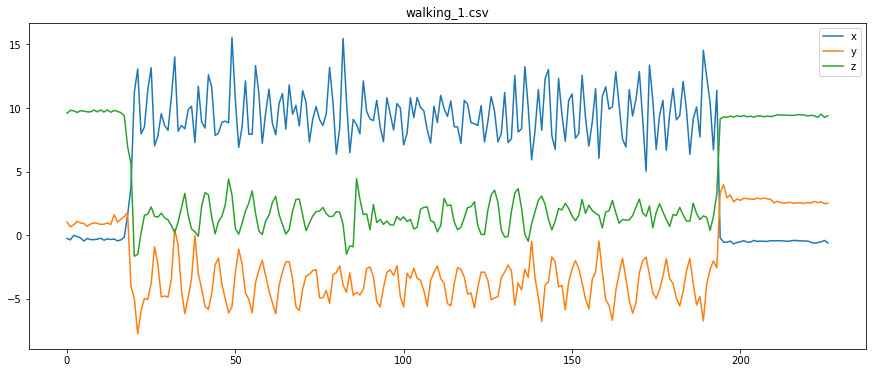

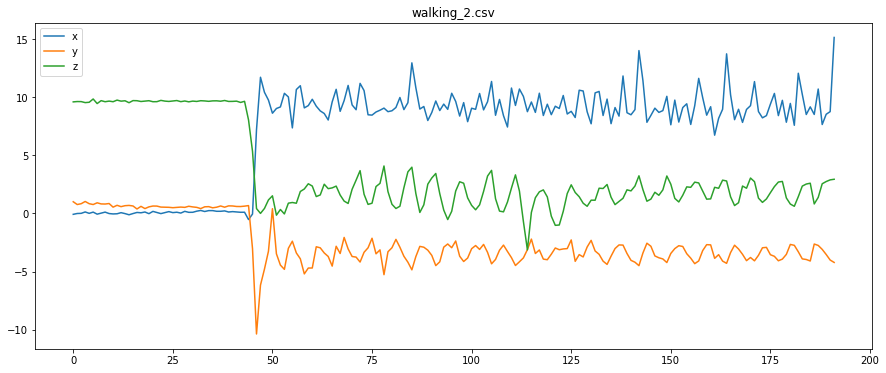

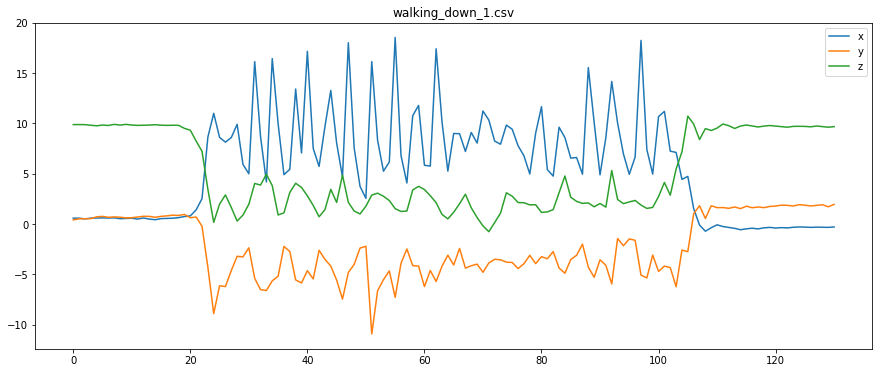

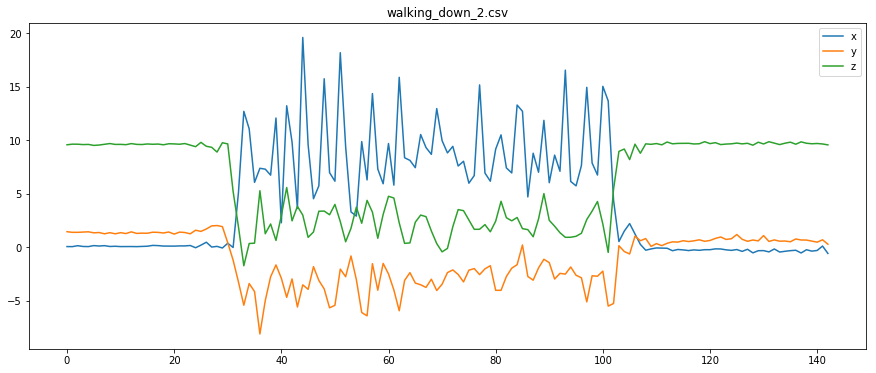

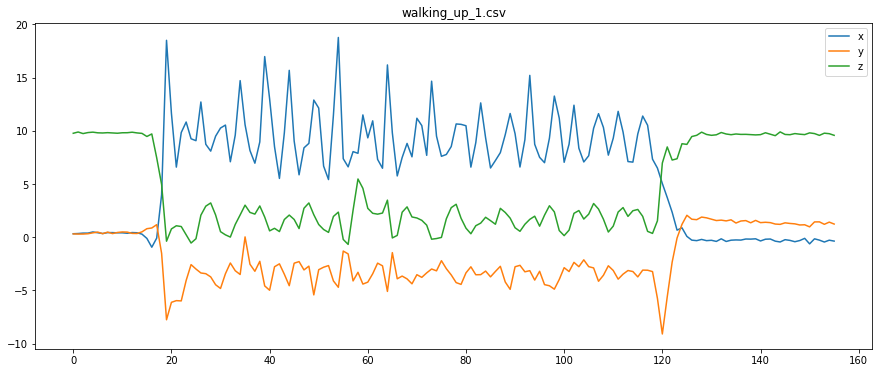

In [5]:
files = ['acc_walking_1.csv','acc_walking_2.csv','acc_walking_down_1.csv','acc_walking_down_2.csv','acc_walking_up_1.csv']
cols = ['timestamp','x','y','z']

for filename in files:
    filepath = 'SmartwatchData/raw_data/' + filename
    fname = filename[4:]
    fname = fname[:-4]
    r_df = pd.read_csv(filepath)
    r_df = r_df[cols]
    print(r_df.head())

#     cols = r_df.columns.tolist()
#     cols = cols[1:] + cols[:1]

    raw_df = r_df[cols]

#     print(raw_df.head())
    raw_df.plot(figsize=(15,6),title=filename[4:])
    plt.savefig(fname + '.png', dpi=300)

    row_len = len(r_df.index)

    dates = [str(r_df.iloc[i,0]).split(' ')[0] for i in range(row_len)]
    secs = [calc_sec(r_df.iloc[i,0].split(' ')[1]) for i in range(row_len)]

    raw_df['date'] = pd.Series(dates, index=raw_df.index)
    raw_df['sec'] = pd.Series(secs, index=raw_df.index)

    # print(raw_df)

    period = calc_t_period(dates,secs)
    # print(period)

    ts = []
    for elem in period:
        ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    #     print(elem[2]-elem[1])

    ts_np = np.array(ts)
#     print(ts_np)

#     raw_df[cols].to_csv(fname + '.csv')

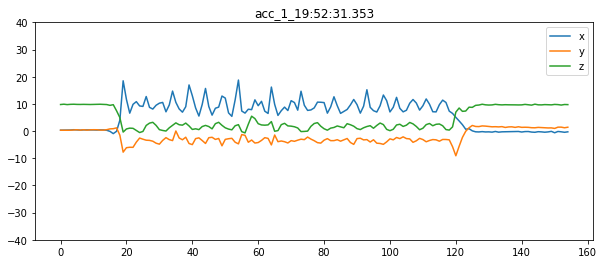

In [6]:
count = 0
cols = ['timestamp','x','y','z']
for elem in period:
    date = elem[0]
    start_t = elem[1]
    end_t = elem[2]
    
    if(end_t-start_t>10):
        for i in range(row_len):
            if(date==raw_df.iloc[i,-2] and start_t==raw_df.iloc[i,-1]):
                start_id = i
            if(date==raw_df.iloc[i,-2] and end_t==raw_df.iloc[i,-1]):
                end_id = i
                count += 1
                new_df = raw_df[start_id:end_id][cols]

#                 plt.figure();
                figname = 'acc_' + str(count) + '_' + calc_ts(start_t)
                
                new_df.plot(figsize=(10,4),title=figname).set_ylim(top=40,bottom=-40)
                plt.savefig(figname + '.png', dpi=300)

                new_df.to_csv(figname + '.csv')
                print('====================')

In [7]:
from os import listdir
from os.path import isfile, join

In [11]:
mypath = '/Users/admin/Desktop/coding/Dementia_proj/SmartwatchData/raw_data'
all_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# print(all_files)

acc_files = [f for f in all_files if(f[-3:]=='csv' and f[0:3]=='acc')]
hr_files = [f for f in all_files if(f[-3:]=='csv' and f[0:2]=='hr')]
# print(acc_files)
# print(hr_files)

all_data_list = []
all_labels = set()
for a in acc_files:
    a = "SmartwatchData/raw_data/" + a
    f = open(a,"r")

    start = "SmartwatchData/raw_data/acc_"
    stop = "_1.csv"


    label = f.name[:-len(stop)]
    label = label[len(start):]
#     print(label)
    all_labels.add(label)

    for line in f:
        e = line.strip('\n').split(',')   # Index, timestamp, x, y, z
        e.append(label)				# Label
        
        if(e[1]!='x'):
#             print(e[1:])
            all_data_list.append(e[1:])
    # break

with open('SmartwatchData/prep_data/labels.txt','w') as label_file:
    for item in all_labels:
        label_file.write(item + " ")

def sortfunc(elem):
    return elem[0]		# Sort by timestamp

all_data_list.sort(key=sortfunc)

print(all_data_list)

with open('SmartwatchData/prep_data/data_acc.csv','w') as data_file:
    writer = csv.writer(data_file)

    headers = ['date','time','x','y','z','label']
    writer.writerow(headers)

    for e in all_data_list:
        date,time = e[0].split(' ')
        new_e = [date,time,e[1],e[2],e[3],e[4]]
        writer.writerow(new_e)

[['2018-10-05 14:42:28.999', '0.59017074', '0.4141969', '9.877279', 'walking_down'], ['2018-10-05 14:42:29.159', '0.58538234', '0.51954174', '9.882067999999999', 'walking_down'], ['2018-10-05 14:42:29.321', '0.51355624', '0.5243302', '9.872491', 'walking_down'], ['2018-10-05 14:42:29.48', '0.59017074', '0.5386954', '9.810242', 'walking_down'], ['2018-10-05 14:42:29.642', '0.59974754', '0.7206547', '9.757569', 'walking_down'], ['2018-10-05 14:42:29.803', '0.61411273', '0.7637503000000001', '9.834184', 'walking_down'], ['2018-10-05 14:42:29.962', '0.59495914', '0.6727706999999999', '9.791088', 'walking_down'], ['2018-10-05 14:42:30.124', '0.61890113', '0.7110779', '9.901221000000001', 'walking_down'], ['2018-10-05 14:42:30.283', '0.5327099000000001', '0.6823475', '9.829395', 'walking_down'], ['2018-10-05 14:42:30.444', '0.5518635000000001', '0.61530983', '9.901221000000001', 'walking_down'], ['2018-10-05 14:42:30.604', '0.5805939', '0.62967503', '9.834184', 'walking_down'], ['2018-10-05 

ValueError: not enough values to unpack (expected 2, got 1)